In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import time

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(101)

# Training the MNIST dataset with Artificial Neural Networks
With the aim of comparing the performance of training convolutional neural networks and artificial neural networks a training of the MNIST dataset is performed with both techniques. 

### Transform MNIST images to tensors

In [ ]:
# instantiate the transformer from image to tensor
transform = transforms.ToTensor()

train_data = datasets.MNIST(root="train_images/MNIST", train=True, transform=transform, download=True)

In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: train_images/MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data = datasets.MNIST(root="train_images/MNIST", train=False, transform=transform, download=True)

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: train_images/MNIST
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
image, label = train_data[0]

In [8]:
image.shape

torch.Size([1, 28, 28])

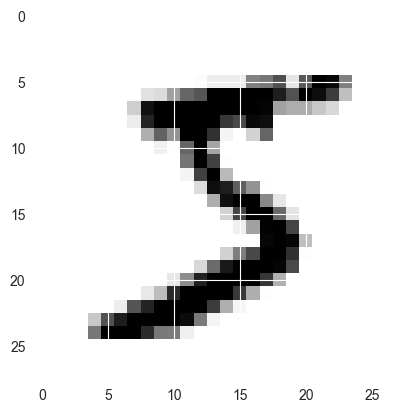

In [9]:
plt.imshow(image.reshape((28,28)), cmap='gist_yarg')

### Prepare the data grouping in batches and shuffling

In [10]:
train_loader = DataLoader(dataset=train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=500, shuffle=True)

### Plot samples of the MNIST Dataset inside the loaders

In [11]:
for images, labels in train_loader:
    break

Labels:  [7 2 3 5 8 5 3 6 9 9 1 3]


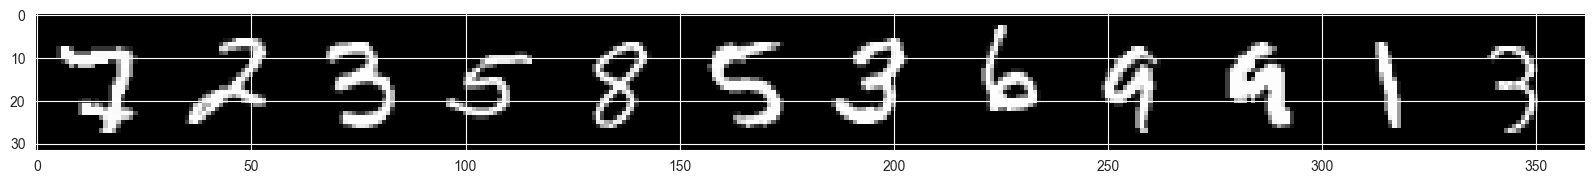

In [16]:
# print the first 12 labels
print("Labels: ", labels[:12].numpy())

# print the first 12 images
im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(20,8))


plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

### Creating the model for training the MNIST dataset with a fully connected neural network

In [13]:
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, output_size, layers):
        super().__init__()
        
        self.fc1 = nn.Linear(input_size, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], output_size)
    
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim=1) #<- for multiclass classification task


### Defining Training instances

In [14]:
model = FullyConnectedNN(784, 10, [120,84]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Training loop

In [15]:
start_time = time.time()

epochs = 10

train_loss = []
test_loss = []
train_correct = []
test_correct = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        X_train, y_train = X_train.to(device), y_train.to(device) 
        
        y_pred = model(X_train.view(100, -1)) # <- flatten the X_train tensor
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1] # <- select the numeric label with the maximum probability
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            print(f'Epoch {i} batch{b} loss:{loss.item():.4f} accuracy:{train_corr.item()*100/(100*b)}')
            
    train_loss.append(loss.item())
    train_correct.append(train_corr)
    
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            y_val = model(X_test.view(500,-1)) #<- see test_loader batch size
            
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()
    
    loss = criterion(y_val, y_test)
    test_loss.append(loss.item())
    test_correct.append(test_corr)

total_time = time.time() - start_time
print(f'Total time: {total_time/60} min')

Epoch 0 batch200 loss:0.2879 accuracy:83.05
Epoch 0 batch400 loss:0.2578 accuracy:87.4275
Epoch 0 batch600 loss:0.2368 accuracy:89.46166666666667
Epoch 1 batch200 loss:0.1500 accuracy:94.73
Epoch 1 batch400 loss:0.0776 accuracy:95.025
Epoch 1 batch600 loss:0.1185 accuracy:95.245
Epoch 2 batch200 loss:0.0505 accuracy:96.375
Epoch 2 batch400 loss:0.1996 accuracy:96.5875
Epoch 2 batch600 loss:0.0673 accuracy:96.69166666666666
Epoch 3 batch200 loss:0.0502 accuracy:97.605
Epoch 3 batch400 loss:0.0996 accuracy:97.585
Epoch 3 batch600 loss:0.0717 accuracy:97.57166666666667
Epoch 4 batch200 loss:0.0560 accuracy:97.975
Epoch 4 batch400 loss:0.1246 accuracy:97.9175
Epoch 4 batch600 loss:0.1498 accuracy:97.945
Epoch 5 batch200 loss:0.1374 accuracy:98.305
Epoch 5 batch400 loss:0.1147 accuracy:98.2825
Epoch 5 batch600 loss:0.0087 accuracy:98.335
Epoch 6 batch200 loss:0.0135 accuracy:98.745
Epoch 6 batch400 loss:0.0913 accuracy:98.72
Epoch 6 batch600 loss:0.0703 accuracy:98.65
Epoch 7 batch200 loss: